# Tutorial:   Statistics and Biomechanics  (ISB 2019, Calgary)

&copy; Todd Pataky, 2019

# Notebook 5:  Validating inferences for multivariate 0D data

The purpose of this notebook is to validate probability values and critical thresholds for multivariate 0D data. This notebook requires use of the [**spm1d**](http://www.spm1d.org) package.

For brevity only the one-sample case is considered.

___
### Part 1:  Test statistic for one-sample multivariate tests: $T^2$

The multivariate analog to the one-sample t test is the [one-sample Hotelling's $T^2$ test](http://www.real-statistics.com/multivariate-statistics/hotellings-t-square-statistic/one-sample-hotellings-t-square/). The test statistic is defined as:

$$ T^2 = J \ (\overline{y}-\mu) \ W^{-1} \ (\overline{y}-\mu)^\top $$

where:

* $J$ is sample size
* $\mu$ is the true (multivariate) sample mean
* $\overline{y}$ is the (multivariate) sample mean
* $W$ is the sample covariance matrix

It can be calculated like this:

In [1]:
import numpy as np
from matplotlib import pyplot
import spm1d

In [2]:
np.random.seed(1)
I    = 2             #number of vector components
J    = 25            #sample size
mu   = np.zeros(I)   #true population mean
W    = np.eye(I)     #true population covariance
y    = np.random.multivariate_normal(mu, W, J)


ybar = np.matrix( y.mean(axis=0) )      #sample mean
w    = np.matrix( np.cov(y.T, ddof=1) ) #sample covariance
T2   = float( J * (ybar-mu) * np.linalg.inv(w) * (ybar-mu).T )

print("Hotelling's T2 statistic: %.5f" %T2)

Hotelling's T2 statistic: 1.64613


It can also be computed using **spm1d.stats.hotellings** like this:

In [3]:
T2   = spm1d.stats.hotellings(y).z

print("Hotelling's T2 statistic: %.5f" %T2)

Hotelling's T2 statistic: 1.64613


___
### Part 2:  Survival function and its inverse for the $T^2$ statistic

Like the univariate probability functions considered in Notebooks 3 and 4, the $T^2$ statistic also has a [survival function](https://en.wikipedia.org/wiki/Hotelling%27s_T-squared_distribution) (SF) and an inverse survival function (ISF). The degrees of freedom for the one-sample case are $(\nu_1, \nu2)$ = $(I, J-1)$. The SF can be computed like this:

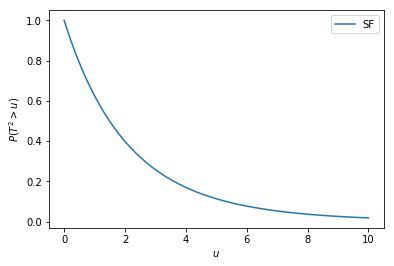

In [4]:
u   = np.linspace(0, 10, 101)
df  = (I, J-1)
sf  = spm1d.rft1d.T2.sf0d(u, df)

ax  = pyplot.axes()
ax.plot(u, sf, label='SF')
ax.set_xlabel('$u$')
ax.set_ylabel(r'$P(T^2>u)$')
ax.legend()
pyplot.show()

and the ISF can be computed like this:

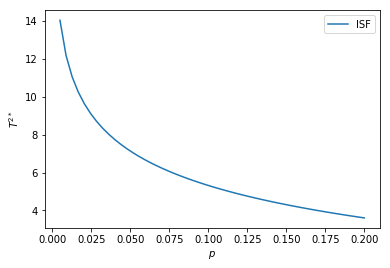

In [5]:
p   = np.linspace(0.2, 0.005, 51)
isf = spm1d.rft1d.T2.isf0d(p, df)

ax  = pyplot.axes()
ax.plot(p, isf, label='ISF')
ax.set_xlabel('$p$')
ax.set_ylabel(r'$T^{2*}$')
ax.legend()
pyplot.show()

___
### Part 3:  Validating the SF and ISF

Like in Notebook 3, the SF and ISF for Hotelling's $T^2$ statistic can be validated using random data simulation, like this:

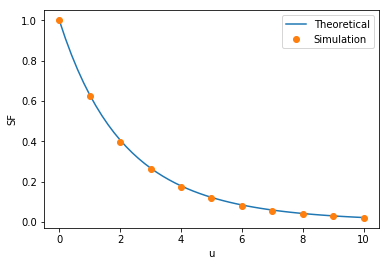

In [6]:
np.random.seed(0)
I     = 2             #number of vector components
J     = 20            #sample size
mu    = np.zeros(I)   #true population mean
W     = np.eye(I)     #true population covariance
niter = 10000         #number of experiments (i.e., simulation iterations)

T2    = np.empty(niter)
for i in range(niter):
    y     = np.random.multivariate_normal(mu, W, J)      #random sample
    T2[i] = spm1d.stats.hotellings(y).z



u0    = np.linspace(0, 10, 51)  #thresholds for the parametric (analytical) SF
u1    = np.linspace(0, 10, 11)  #thresholds for the numerical SF

df    = (I, J-1)                       #degrees of freedom
sf0   = spm1d.rft1d.T2.sf0d(u0, df)    #theoretical SF
sf1   = [(T2>uu).mean() for uu in u1]  #numerical SF (from simulation)



ax = pyplot.axes()
ax.plot(u0, sf0, '-', label='Theoretical')
ax.plot(u1, sf1, 'o', label='Simulation')
ax.set_xlabel('u')
ax.set_ylabel('SF')
ax.legend()
pyplot.show()

Great!  The simulated data behave as expected theoretically.

You may have noticed that this simulation took much longer than the simulation for univariate 0D data. In general, as the data become more complex, the simulations become longer. For modern statistical inference involving complex data it is not unusual for numerical validation simulations like these to require days or even weeks.

Numerical validatation of the ISF is left for optional work.

___
### Summary:

This notebook has shown that:
* Univariate tests have multivariate equivalents. In this case: the one-sample t test (for univariate data) generalizes to the one-sample Hotelling's $T^2$ test (for multivariate data).
* Probability values from multivariate hypothesis testing (i.e., the survival function) can be numerically validated by simulating a large number of experiments involving multivariate data
* As data complexity increases, simulation durations generally also increase